12-10-21 Riddler Classic https://fivethirtyeight.com/features/en-garde-can-you-win-the-fencing-relay/

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def permute(list):
    ans = []
    
    def helper(cume, list):
        if len(cume) == 3:
            if cume not in ans:
                ans.append(cume.copy())
            return
        for i in range(len(list)):
            cume.append(list[i])
            helper(cume, list[:i]+list[i+1:])
            cume.pop()
    helper([], list)
    return ans

def simulation(a_score, b_score, prob, limit):
    while a_score < limit and b_score < limit:
        turn = np.random.uniform(0, 1)
        if turn < prob:
            a_score += 1
        else:
            b_score += 1
    return a_score, b_score

def to_45(probabilities):
    a0 = 0
    b0 = 0
    a1, b1 = simulation(a0, b0, probabilities[0], 15)
    a2, b2 = simulation(a1, b1, probabilities[1], 30)
    a3, b3 = simulation(a2, b2, probabilities[2], 45)
    return [a1, b1, a2, b2, a3, b3]


In [4]:
orders = permute([0.75, 0.5, 0.25])
print(orders)

[[0.75, 0.5, 0.25], [0.75, 0.25, 0.5], [0.5, 0.75, 0.25], [0.5, 0.25, 0.75], [0.25, 0.75, 0.5], [0.25, 0.5, 0.75]]


In [5]:
zero = []
one = []
two = []
three = []
four = []
five = []
dict = {0:zero, 1: one, 2:two, 3:three, 4:four, 5:five}

for i in range(len(orders)):
    for j in range(100000):
        dict[i].append(to_45(orders[i]))
strat_755025 = pd.DataFrame(zero, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_752550 = pd.DataFrame(one, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_507525 = pd.DataFrame(two, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_502575 = pd.DataFrame(three, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_257550 = pd.DataFrame(four, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_255075 = pd.DataFrame(five, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])

In [6]:
strat_755025['strat'] = '75-50-25'
strat_752550['strat'] = '75-25-50'
strat_507525['strat'] = '50-75-25'
strat_502575['strat'] = '50-25-75'
strat_257550['strat'] = '25-75-50'
strat_255075['strat'] = '25-50-75'

In [7]:
strat_755025['win_percent'] = strat_755025[strat_755025.a3 == 45].count()['a3']/100000
strat_752550['win_percent'] = strat_752550[strat_752550.a3 == 45].count()['a3']/100000
strat_507525['win_percent'] = strat_507525[strat_507525.a3 == 45].count()['a3']/100000
strat_502575['win_percent'] = strat_502575[strat_502575.a3 == 45].count()['a3']/100000
strat_257550['win_percent'] = strat_257550[strat_257550.a3 == 45].count()['a3']/100000
strat_255075['win_percent'] = strat_255075[strat_255075.a3 == 45].count()['a3']/100000
strat_255075.head()

,a1,b1,a2,b2,a3,b3,strat,win_percent
0,5,15,22,30,45,38,25-50-75,0.93174
1,1,15,17,30,45,38,25-50-75,0.93174
2,6,15,25,30,45,37,25-50-75,0.93174
3,2,15,14,30,45,35,25-50-75,0.93174
4,4,15,20,30,45,40,25-50-75,0.93174


In [8]:
main_df = pd.concat([strat_755025, strat_752550, strat_507525, strat_502575, strat_257550, strat_255075])
main_df.head()

,a1,b1,a2,b2,a3,b3,strat,win_percent
0,15,6,30,20,38,45,75-50-25,0.06822
1,15,3,30,14,37,45,75-50-25,0.06822
2,15,5,30,21,38,45,75-50-25,0.06822
3,15,8,30,26,34,45,75-50-25,0.06822
4,15,10,26,30,28,45,75-50-25,0.06822


In [48]:
cte = main_df.assign(Win_Rate = main_df['win_percent'], a2_gap = main_df['a2']-main_df['a1'], b2_gap = main_df['b2']-main_df['b1'], a3_gap = main_df['a3']-main_df['a2'], b3_gap = main_df['b3']-main_df['b2']).groupby(['strat', 'win_percent'])['Win_Rate', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a2_gap', 'b2_gap', 'a3_gap', 'b3_gap'].mean().sort_values(by=['win_percent'], ascending = False)
cte['Strategy'] = ['25-50-75', '50-25-75', '25-75-50', '75-25-50', '50-75-25', '75-50-25']
cte.head(6)

/var/folders/qb/m523t88x4cbc9m38670pqwvm0000gn/T/ipykernel_13258/640776949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cte = main_df.assign(Win_Rate = main_df['win_percent'], a2_gap = main_df['a2']-main_df['a1'], b2_gap = main_df['b2']-main_df['b1'], a3_gap = main_df['a3']-main_df['a2'], b3_gap = main_df['b3']-main_df['b2']).groupby(['strat', 'win_percent'])['Win_Rate', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a2_gap', 'b2_gap', 'a3_gap', 'b3_gap'].mean().sort_values(by=['win_percent'], ascending = False)


,,Win_Rate,a1,b1,a2,b2,a3,b3,a2_gap,b2_gap,a3_gap,b3_gap,Strategy
strat,win_percent,,,,,,,,,,,,
25-50-75,0.93174,0.93174,5.00897,14.99627,19.81065,29.79826,44.63616,38.08229,14.80168,14.80199,24.82551,8.28403,25-50-75
50-25-75,0.92425,0.92425,12.83298,12.83905,18.55414,29.97821,44.60288,38.65649,5.72116,17.13916,26.04874,8.67828,50-25-75
25-75-50,0.82554,0.82554,4.99160,14.99586,29.78694,23.26409,44.27977,37.75422,24.79534,8.26823,14.49283,14.49013,25-75-50
75-25-50,0.17415,0.17415,14.99574,4.98706,23.26155,29.78152,37.75844,44.28153,8.26581,24.79446,14.49689,14.50001,75-25-50
50-75-25,0.07635,0.07635,12.83406,12.82942,29.97735,18.53831,38.68439,44.59901,17.14329,5.70889,8.70704,26.06070,50-75-25
75-50-25,0.06822,0.06822,14.99520,5.01299,29.79035,19.80931,38.06931,44.63602,14.79515,14.79632,8.27896,24.82671,75-50-25


Text(0, 0.5, 'Win Percent')

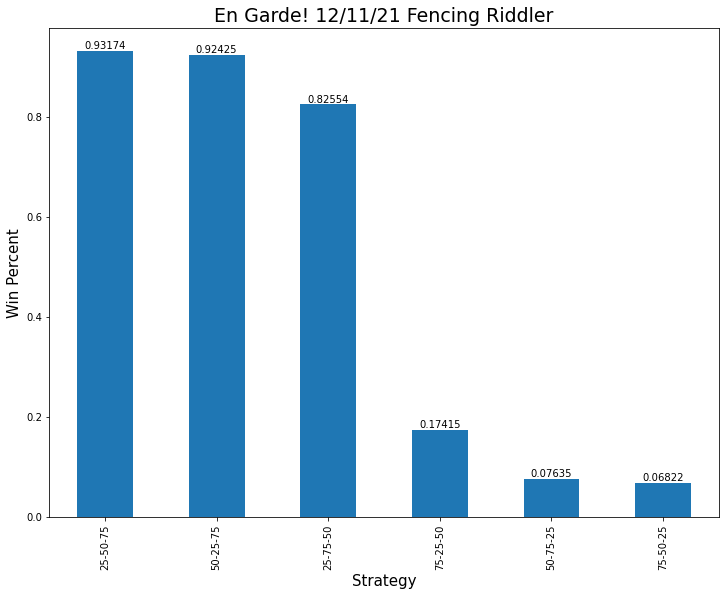

In [67]:
ax = cte.plot.bar(x = 'Strategy', y = 'Win_Rate', figsize = (12, 9), legend = False)
ax.bar_label(ax.containers[0])
plt.title('En Garde! 12/11/21 Fencing Riddler', fontsize = 19)
plt.xlabel('Strategy', fontsize = 15)
plt.ylabel('Win Percent', fontsize = 15)

In [68]:
cte.head(6)

,,Win_Rate,a1,b1,a2,b2,a3,b3,a2_gap,b2_gap,a3_gap,b3_gap,Strategy
strat,win_percent,,,,,,,,,,,,
25-50-75,0.93174,0.93174,5.00897,14.99627,19.81065,29.79826,44.63616,38.08229,14.80168,14.80199,24.82551,8.28403,25-50-75
50-25-75,0.92425,0.92425,12.83298,12.83905,18.55414,29.97821,44.60288,38.65649,5.72116,17.13916,26.04874,8.67828,50-25-75
25-75-50,0.82554,0.82554,4.99160,14.99586,29.78694,23.26409,44.27977,37.75422,24.79534,8.26823,14.49283,14.49013,25-75-50
75-25-50,0.17415,0.17415,14.99574,4.98706,23.26155,29.78152,37.75844,44.28153,8.26581,24.79446,14.49689,14.50001,75-25-50
50-75-25,0.07635,0.07635,12.83406,12.82942,29.97735,18.53831,38.68439,44.59901,17.14329,5.70889,8.70704,26.06070,50-75-25
75-50-25,0.06822,0.06822,14.99520,5.01299,29.79035,19.80931,38.06931,44.63602,14.79515,14.79632,8.27896,24.82671,75-50-25


In [71]:
a1_list = cte['a1'].tolist()
b1_list = cte['b1'].tolist()
a2_list = cte['a2_gap'].tolist()
b2_list = cte['b2_gap'].tolist()
a3_list = cte['a3_gap'].tolist()
b3_list = cte['b3_gap'].tolist()
cte2 = pd.DataFrame({'Round1_A': a1_list, 'Round1_B': b1_list, 'Round2_A': a2_list, 'Round2_B': b2_list, 'Round3_A': a3_list, 'Round3_B': b3_list}, ['25-50-75', '50-25-75', '25-75-50', '75-25-50', '50-75-25', '75-50-25'])
cte2.head(6)

,Round1_A,Round1_B,Round2_A,Round2_B,Round3_A,Round3_B
25-50-75,5.00897,14.99627,14.80168,14.80199,24.82551,8.28403
50-25-75,12.83298,12.83905,5.72116,17.13916,26.04874,8.67828
25-75-50,4.99160,14.99586,24.79534,8.26823,14.49283,14.49013
75-25-50,14.99574,4.98706,8.26581,24.79446,14.49689,14.50001
50-75-25,12.83406,12.82942,17.14329,5.70889,8.70704,26.06070
75-50-25,14.99520,5.01299,14.79515,14.79632,8.27896,24.82671
